In [15]:
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [9]:
x=load_iris()["data"]
y=load_iris()["target"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,test_size=.20)

In [12]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pre=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pre))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre))
print("Classification Report:",classification_report(y_test,y_pre))

Accuracy: 1.0
Confusion Matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0

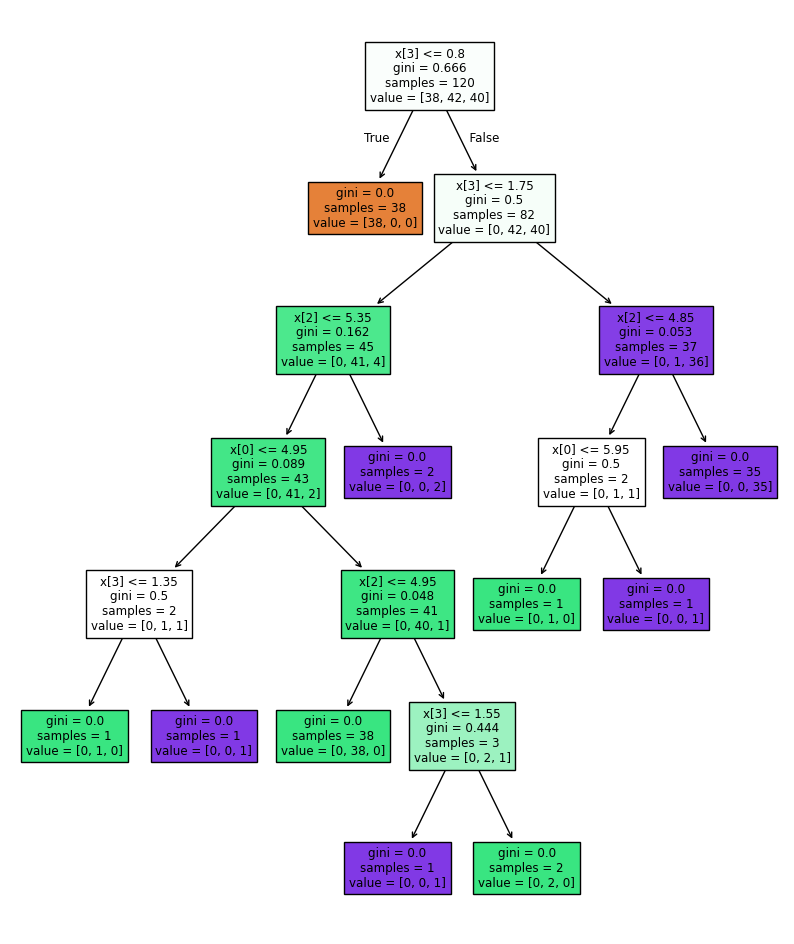

In [17]:
plt.figure(figsize=(10,12))
tree.plot_tree(dt,filled=True)

# Pruning of Tree
### Post Pruning

In [23]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
y_pre=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pre))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre))
print("Classification Report:",classification_report(y_test,y_pre))

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

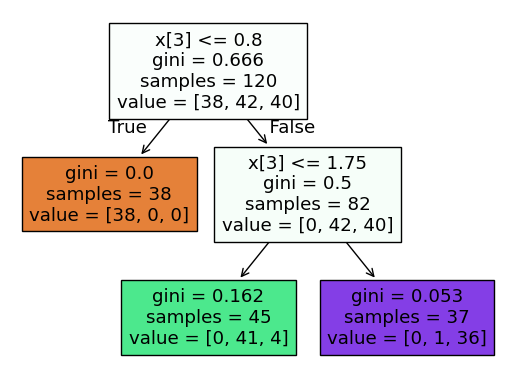

In [25]:
tree.plot_tree(dt,filled=True)

### Pre-Pruning 

#### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
model=DecisionTreeClassifier()

In [41]:
param={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features': ['sqrt', 'log2',3,2,4]
}

In [42]:
gv=GridSearchCV(estimator=model,param_grid=param,cv=5,n_jobs=-1)

In [43]:
gv.fit(x_train,y_train)

/Users/bhavuksagar/Desktop/Data Science/venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', 3, 2, 4],
                         'splitter': ['best', 'random']})

In [44]:
gv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [45]:
gv.best_score_

0.9583333333333334

In [46]:
y_pre=gv.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pre))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pre))
print("Classification Report:",classification_report(y_test,y_pre))

Accuracy: 0.9333333333333333
Confusion Matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

